<a href="https://colab.research.google.com/github/kostaspapa2025/Phishing_Dataset/blob/main/anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#εγκατάσταση πακέτου PyOD (https://pyod.readthedocs.io/en/latest/)
!pip install pyod

In [ ]:
#εισαγωγή βιβλιοθηκών - πακέτων
import pandas as pd
from sklearn.preprocessing import StandardScaler
from pyod.models.ecod import ECOD
import matplotlib.pyplot as plt

In [ ]:
#εισαγωγή του συνόλου δεδομένων
network_data = pd.read_csv('https://raw.githubusercontent.com/kdemertzis/EKPA/main/Data/network_traffic_data.csv', delimiter=',')

In [ ]:
#εξαγωγή χαρακτηριστικών (ανεξάρτητων μεταβλητών) για την αναγνώριση ανωμαλιών
features = ['src_port', 'dest_port', 'packet_size', 'num_packets',
            'flow_duration', 'bytes_transferred', 'packet_rate']

X = network_data[features].values

In [ ]:
#κλιμάκωση δεδομένων
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Εκπαίδευση του ECOD μοντέλου
clf = ECOD()
clf.fit(X_scaled)

ECOD(contamination=0.1, n_jobs=1)

In [ ]:
# Πρόβλεψη ανωμαλιών
y_pred = clf.labels_
y_scores = clf.decision_scores_

In [ ]:
#προσθήκη βαθμού ανωμαλίας (anomaly score) στο σύνολο δεδομένων
network_data['anomaly_score'] = y_pred

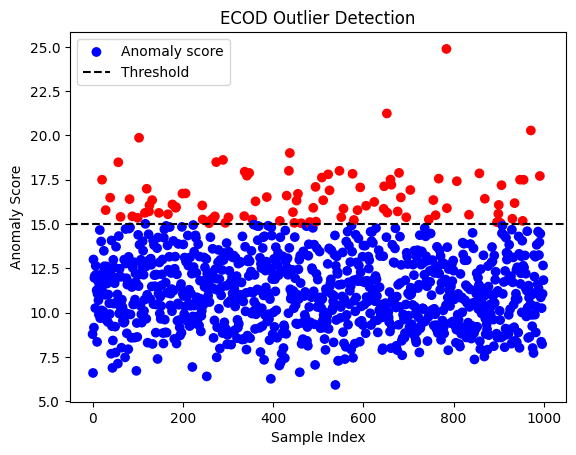

In [ ]:
#οπτικοποίηση αποτελεσμάτων, με μπλε οι τιμές που θεωρούνται κανονικές και με κόκκινο όσες καταγράφονται ως ανωμαλίες
colors = ['blue' if score <= clf.threshold_ else 'red' for score in y_scores]

plt.scatter(network_data.index, y_scores, c=colors, label='Anomaly score')
plt.axhline(y=clf.threshold_, color='black', linestyle='--', label='Threshold')
plt.xlabel('Sample Index')
plt.ylabel('Anomaly Score')
plt.title('ECOD Outlier Detection')
plt.legend()
plt.show()

In [ ]:
#τύπωση των τιμών που εντοπίσθηκαν ως ανωμαλίες
anomalies = network_data[y_pred == 1]
print(anomalies)

              src_ip          dest_ip  src_port  ...  packet_rate            timestamp  anomaly_score
21     38.231.226.53  174.108.182.191     64480  ...         3495  2023-01-01 00:21:00              1
29     200.39.16.128   82.133.120.224     53943  ...         4578  2023-01-01 00:29:00              1
39      7.222.148.80  183.118.194.113     40803  ...         4150  2023-01-01 00:39:00              1
57      14.119.240.3    156.201.16.65      1167  ...         2281  2023-01-01 00:57:00              1
62    157.250.246.12     250.130.9.97     14171  ...         2772  2023-01-01 01:02:00              1
..               ...              ...       ...  ...          ...                  ...            ...
947  100.219.255.155   171.180.70.107      7334  ...          893  2023-01-01 15:47:00              1
953    140.172.9.227    31.104.83.128     19649  ...         3201  2023-01-01 15:53:00              1
955   154.33.242.128  197.210.145.133     20173  ...          111  2023-01-01 15:5